# Making lists of nodes and edges with integer numbers

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, ConnectionPatch
import numpy as np
import time

In [23]:
G = nx.nx_agraph.read_dot('./Dataset/LeagueNetwork.dot/LeagueNetwork.dot')

edge_list =[]
for e in G.edges():
    u,v = e
    edge_list.append((int(u), int(v)))

node_list = []
for i in G.nodes():
    node_list.append(int(i))
    
print(len(edge_list))
print(len(node_list))

239
16


# Adjacency List

In [24]:
adjacency_list = {}
for edge in edge_list:
    source, target = edge
    if source not in adjacency_list:
        adjacency_list[source] = []
    adjacency_list[source].append(target)
#     # for undirected graph, we also add the reverse edge
#     if target not in adjacency_list:
#         adjacency_list[target] = []
#     adjacency_list[target].append(source)
    
print(adjacency_list)

{1: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 2: [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 3: [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 4: [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 5: [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 6: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 7: [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16], 8: [1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16], 9: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16], 10: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16], 11: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16], 12: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16], 13: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16], 14: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16], 15: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16], 16: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}


# Assigning random positions to each node

In [98]:
pos = {node: np.random.rand(2) for node in adjacency_list.keys()}
print(pos)

{1: array([0.39161961, 0.95814148]), 2: array([0.8725656 , 0.95831406]), 3: array([0.34551292, 0.273753  ]), 4: array([0.69947327, 0.958119  ]), 5: array([0.25803752, 0.9496655 ]), 6: array([0.41473914, 0.23217559]), 7: array([0.93040143, 0.76452104]), 8: array([0.37061267, 0.54360372]), 9: array([0.82250866, 0.26638447]), 10: array([0.26096076, 0.17996407]), 11: array([0.20120884, 0.94797526]), 12: array([0.50317159, 0.59413688]), 13: array([0.24130447, 0.69002262]), 14: array([0.90180687, 0.65931995]), 15: array([0.18542619, 0.56705039]), 16: array([0.89879277, 0.67409261])}


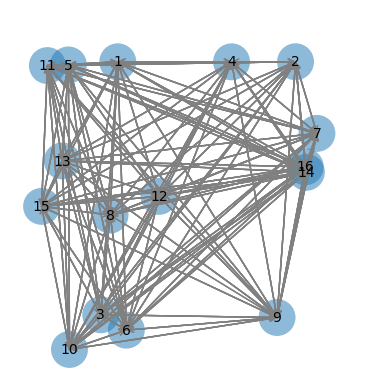

In [99]:
fig, ax = plt.subplots()

for node, position in pos.items():
    circle = Circle(position, radius=0.05, alpha=0.5)
    ax.add_patch(circle)
    plt.text(*position, str(node), size=10, ha='center', va='center')


for source, targets in adjacency_list.items():
    for target in targets:
        edge = ConnectionPatch(pos[source], pos[target], 'data', arrowstyle='->', color='grey')
        ax.add_patch(edge)

ax.set_xlim(0.1, 1.1)
ax.set_ylim(0.1, 1.1)
ax.set_aspect('equal')
plt.axis('off')

plt.show()

# Computational Complexity

## The computational complexity of the layout depends on how we choose to position the nodes. Since we use a random layout like above, the complexity is O(n), where n is the number of nodes.

# Pros: 
## With a custom layout, we have complete control over the positioning of nodes and can tailor the layout to highlight specific features of the graph.

# Cons: 
## It may be difficult to produce a layout that is as optimized or clear as those produced by more sophisticated algorithms. The generated layout has issues like node overlap or too many edge crossings.

<h1 style='color:red'> Bonus (Circular Layout)</h1>

In [86]:
n = len(adjacency_list)
radius = 1
center_x, center_y = 0.5, 0.5  


position = {}
for i, node in enumerate(adjacency_list):
    angle = 2 * np.pi * i / n
    position[node] = (center_x + radius * np.cos(angle), center_y + radius * np.sin(angle))


position

{1: (1.5, 0.5),
 2: (1.4238795325112867, 0.8826834323650898),
 3: (1.2071067811865475, 1.2071067811865475),
 4: (0.8826834323650898, 1.4238795325112867),
 5: (0.5000000000000001, 1.5),
 6: (0.11731656763491027, 1.4238795325112867),
 7: (-0.20710678118654746, 1.2071067811865475),
 8: (-0.42387953251128674, 0.8826834323650898),
 9: (-0.5, 0.5000000000000001),
 10: (-0.42387953251128685, 0.11731656763491033),
 11: (-0.20710678118654768, -0.20710678118654746),
 12: (0.11731656763490966, -0.4238795325112865),
 13: (0.49999999999999983, -0.5),
 14: (0.8826834323650901, -0.4238795325112866),
 15: (1.2071067811865475, -0.20710678118654768),
 16: (1.4238795325112865, 0.11731656763490961)}

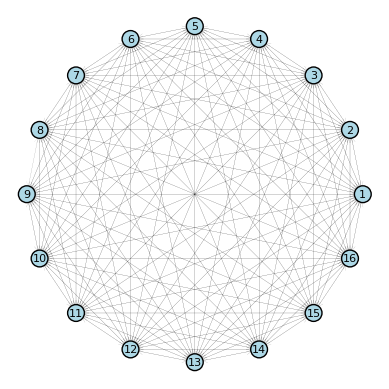

The algorithm took 9.481544733047485 seconds.


In [94]:
start_time = time.time()
fig, ax = plt.subplots()

for source, targets in adjacency_list.items():
    for target in targets:
        if source in position and target in position:  
            edge = ConnectionPatch(position[source], position[target], 'data', 
                                   arrowstyle='->', shrinkA=5, shrinkB=5, zorder=1, edgecolor='black',
                                  alpha=0.3, linewidth=0.1)
            ax.add_patch(edge)
            
for node, (x, y) in position.items():
    ax.add_patch(Circle((x, y), 0.05, zorder=2, edgecolor='black', facecolor='lightblue'))
    plt.text(x, y, str(node), ha='center', va='center', zorder=3, fontsize=8, color='black')


ax.set_xlim(-0.6, 1.6)
ax.set_ylim(-0.6, 1.6)
ax.set_aspect('equal')
plt.axis('off')
plt.show()
end_time = time.time()
print(f"The algorithm took {end_time - start_time} seconds.")

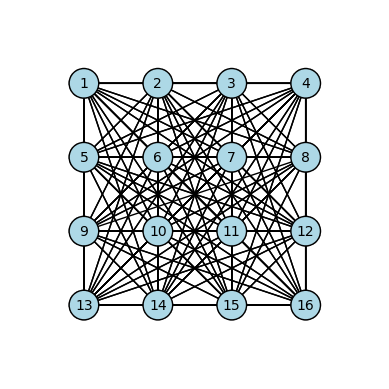

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

# Assuming we have a grid of size 4x4 for our 16 nodes
grid_size = 4
positions = {}

# Assign grid positions to nodes
for i in range(1, grid_size**2 + 1):
    # Calculate grid coordinates
    x = (i - 1) % grid_size
    y = grid_size - 1 - (i - 1) // grid_size
    positions[i] = (x, y)

# Now, we'll draw the nodes on the grid
fig, ax = plt.subplots()

# Draw the grid
for x in range(grid_size):
    for y in range(grid_size):
        ax.add_patch(Circle((x, y), 0.2, fill=False, color='gray', linestyle='--'))

# Draw the edges
for source, targets in adjacency_list.items():
    for target in targets:
        if source in positions and target in positions:
            source_pos = positions[source]
            target_pos = positions[target]
            # Check if we have an actual directed graph
            if target_pos != source_pos:  # Prevent self-loop drawing
                arrow = FancyArrowPatch(source_pos, target_pos, arrowstyle='-|>', mutation_scale=10, color='black')
                ax.add_patch(arrow)

# Draw the nodes
for node, (x, y) in positions.items():
    circle = Circle((x, y), 0.2, edgecolor='black', facecolor='lightblue')
    ax.add_patch(circle)
    plt.text(x, y, str(node), ha='center', va='center', color='black')

# Set the limits and aspect
ax.set_xlim(-1, grid_size)
ax.set_ylim(-1, grid_size)
ax.set_aspect('equal')
plt.axis('off')  # Turn off the axis
plt.show()


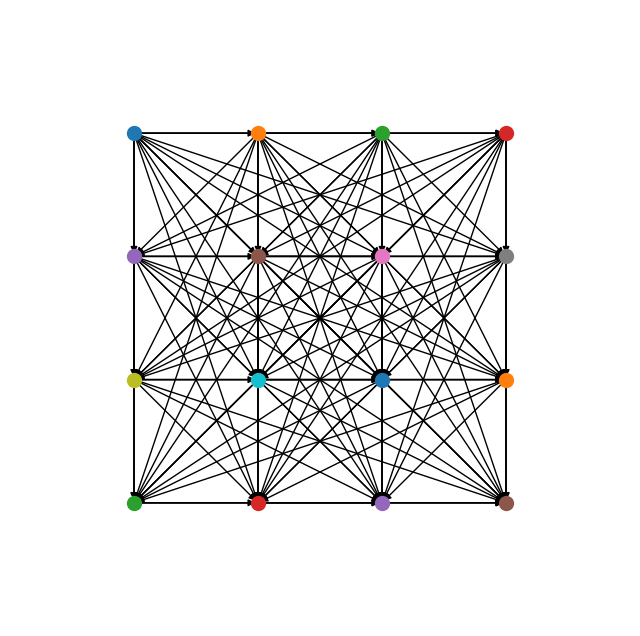

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.patches import FancyArrowPatch

# Number of nodes
N = 16

# Calculate grid size (you might need to adjust this for non-square grids)
grid_size = math.ceil(math.sqrt(N))

# Generate grid positions
positions = {}
for i in range(N):
    row = i // grid_size
    col = i % grid_size
    positions[i+1] = (col, grid_size - row - 1)  # +1 if nodes are 1-indexed

# Plotting the grid layout
fig, ax = plt.subplots(figsize=(8, 8))

# Draw the nodes and labels
for node, (x, y) in positions.items():
    ax.plot(x, y, 'o', markersize=10)
#     ax.text(x, y + 0.1, str(node), ha='center')  # Adjust text alignment and position as needed

# Connect nodes with directed edges (arrows)
for i in range(1, N+1):
    for j in range(i+1, N+1):  # Avoid duplicate edges and self-loops
        x1, y1 = positions[i]
        x2, y2 = positions[j]
        
        # Create an arrow patch and add to the plot
        arrow = FancyArrowPatch((x1, y1), (x2, y2), arrowstyle='-|>', mutation_scale=10,
                                lw=1, color='k', connectionstyle='arc3,rad=0')
        ax.add_patch(arrow)

# Set axis limits and hide axes
ax.set_xlim(-1, grid_size)
ax.set_ylim(-1, grid_size)
plt.axis('off')

plt.show()


In [28]:
weighted_adjacency_matrix = np.zeros((len(node_list), len(node_list)))
for u, v, data in G.edges(data=True):
    weighted_adjacency_matrix[int(u)-1][int(v)-1] = data['goal_difference']

print(weighted_adjacency_matrix)

[[ 0.  1.  1.  0.  2.  5.  4.  1.  0.  1.  5.  1.  1.  0.  4.  1.]
 [ 0.  0.  0.  2.  0.  2.  4.  1.  0.  1.  2.  7.  3.  2. -1.  4.]
 [ 2. -1.  0.  1.  0.  3.  3.  1.  1.  3.  3.  2.  2.  1.  2. -1.]
 [ 1. -2.  2.  0.  1.  1.  3.  0.  0. -1.  1.  1.  0.  1.  1.  2.]
 [ 1. -3.  1.  6.  0.  0.  0. -1.  2.  0.  2.  1.  1.  0.  5. -2.]
 [ 0.  1.  0.  1.  0.  0.  1.  0.  1.  2.  0.  1.  0.  3.  0.  3.]
 [ 1. -2.  0.  3. -2. -1.  0.  1.  0.  1. -2. -2. -1. -1.  3.  0.]
 [ 1. -2.  0.  1.  1.  1.  0.  0.  0.  1.  0.  2.  1.  1.  1.  1.]
 [-3. -1.  0.  2.  0.  3. -3.  0.  0.  0.  0.  1.  5.  2.  2.  3.]
 [ 1.  0.  0. -3. -1.  0.  1.  0. -1.  0.  0.  1.  0.  1.  3. -1.]
 [-2.  1.  2.  1. -1. -1.  0.  1.  1.  3.  0.  2.  2.  2. -1.  1.]
 [-3. -1. -2.  0. -1. -4. -1. -1.  1.  1. -3.  0. -1.  1.  0.  3.]
 [ 1.  1. -1.  0. -1. -2.  0. -1. -1.  0.  0.  0.  0.  2.  0.  2.]
 [-1.  0.  2. -3.  3. -2. -1.  0.  0.  1.  1.  1.  3.  0.  0.  1.]
 [-1. -2.  0. -4. -4. -1.  3.  0.  0. -2. -1. -2.  1.  1.  0. 

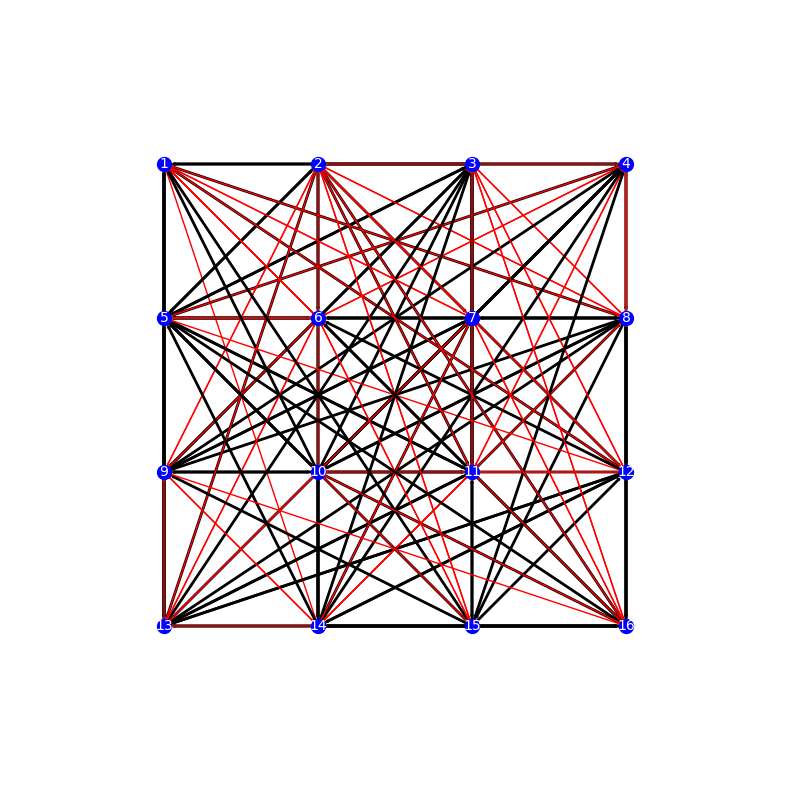

In [33]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import numpy as np
import math



N = 16  # Number of nodes

# Calculate grid size
grid_size = int(math.ceil(math.sqrt(N)))

# Generate grid positions
positions = {node: (node % grid_size, grid_size - node // grid_size - 1) for node in range(N)}

# Create a figure
fig, ax = plt.subplots(figsize=(10, 10))

# Draw the nodes
for node, (x, y) in positions.items():
    ax.scatter(x, y, s=100, color='blue', zorder=5)
    ax.text(x, y, str(node+1), color='white', ha='center', va='center', zorder=6)

# Draw the edges
for i in range(N):
    for j in range(N):
        if weighted_adjacency_matrix[i][j] != 0:
            weight = weighted_adjacency_matrix[i][j]
            arrowstyle = '-|>' if weight > 0 else '->'
            color = 'black' if weight > 0 else 'red'
            linewidth = 2 if weight > 0 else 1
            arrow = FancyArrowPatch(positions[i], positions[j], arrowstyle=arrowstyle,
                                    color=color, linewidth=linewidth, shrinkA=5, shrinkB=5, zorder=3)
            ax.add_patch(arrow)

# Set the limits and aspect
ax.set_xlim(-1, grid_size)
ax.set_ylim(-1, grid_size)
ax.set_aspect('equal')
plt.axis('off')

# Show plot
plt.show()


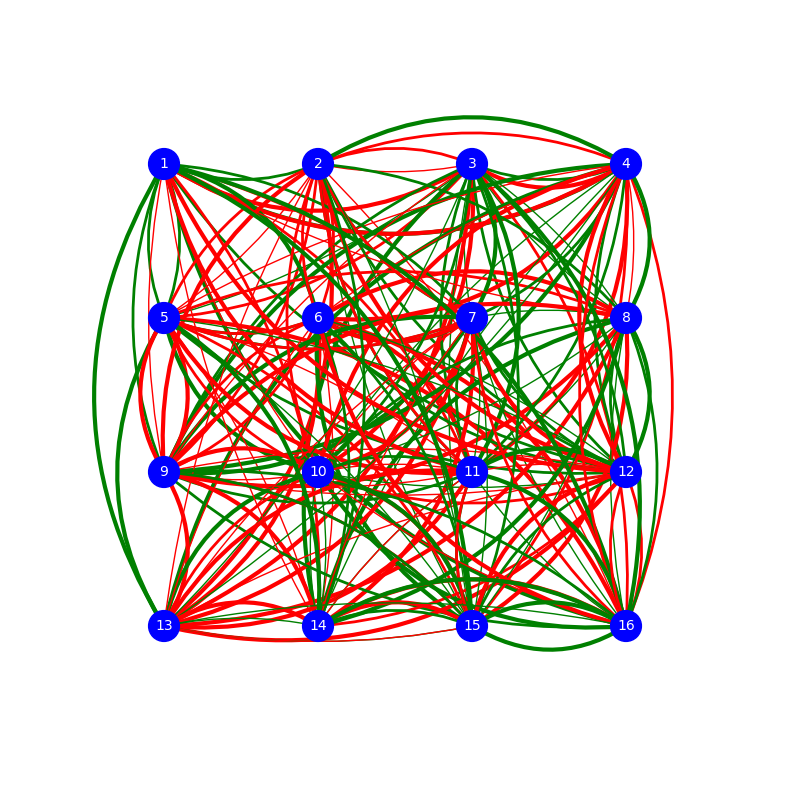

In [40]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, ConnectionPatch
import numpy as np
import math

# Assuming 'weighted_adjacency_matrix' is an NxN numpy array-like structure
# Replace this with your actual weighted adjacency matrix
weighted_adjacency_matrix = np.random.randint(-3, 4, (N, N))  # Example data

N = 16  # Number of nodes
grid_size = int(math.ceil(math.sqrt(N)))  # Calculate grid size

# Generate grid positions
positions = {node: (node % grid_size, grid_size - node // grid_size - 1) for node in range(N)}

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Draw the nodes
for node, (x, y) in positions.items():
    circle = Circle((x, y), 0.1, color='blue', zorder=5)  # Node size can be adjusted
    ax.add_patch(circle)
    ax.text(x, y, str(node+1), color='white', ha='center', va='center', zorder=6)

# Draw the edges
for i in range(N):
    for j in range(N):
        weight = weighted_adjacency_matrix[i][j]
        if weight != 0:  # Draw an edge only if there is a non-zero weight
            arrowstyle = '->,head_length=0.4,head_width=0.2'  # Adjust head size as needed
            color = 'green' if weight > 0 else 'red'  # Positive weights in green, negative in red
            linewidth = np.abs(weight)  # Line width proportional to weight
            connectionstyle = f"arc3,rad={0.1*weight}"  # Curvature controlled by weight
            patch = ConnectionPatch(positions[i], positions[j], coordsA="data", coordsB="data",
                                    arrowstyle=arrowstyle, color=color, linewidth=linewidth,
                                    connectionstyle=connectionstyle, zorder=3)
            ax.add_patch(patch)

# Set limits and aspect ratio
ax.set_xlim(-1, grid_size)
ax.set_ylim(-1, grid_size)
ax.set_aspect('equal')
plt.axis('off')

# Show the plot
plt.show()
